In [1]:
import pandas as pd
import numpy as np

In [2]:
igre = pd.read_csv("obdelani_podatki/izluscene_igre.csv")
igre["petletje"] = igre["leto"] // 5 * 5
igre

,indeks_igre,prvi_igralec,prvi_id,drugi_igralec,drugi_id,izid,stevilo_potez,leto,kraj,odprtje_eco,odprtje,petletje
0,1243387,Mackowiak,73299,Kusiak,73300,1-0,5,1980,Lublin,B00,Uncommon King's Pawn Opening,1980
1,1251073,Deming,77680,Cornell,33568,1-0,6,1980,Indiana Winter op,B20,Sicilian,1980
2,1077144,B Wall,32393,G Hayes,32944,1-0,7,1980,Dayton,C39,King's Gambit Accepted,1980
3,1243385,Ziganovic,73296,Laketic,41055,1-0,7,1980,Joegoeslavie,B13,"Caro-Kann, Exchange",1980
4,1251060,B Wall,32393,R J Lovegren,77670,1-0,7,1980,Dayton,C15,"French, Winawer",1980
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1958286,K I Esbensen,104549,Rick Hodges,162554,1-0,15,2019,Reykjavik Open,A52,Budapest Gambit,2015
4996,1958207,Gudrun Fanney Briem,162618,Hreinn Hrafnsson,154339,0-1,3,2019,Reykjavik Open,B20,Sicilian,2015
4997,1958280,Hjorleifur Halldorsson,158274,J Halldorsson,11014,0-1,10,2019,Reykjavik Open,A07,King's Indian Attack,2015
4998,1958211,K E Steingrimsson,149329,Adam Omarsson,162590,0-1,14,2019,Reykjavik Open,A46,Queen's Pawn Game,2015


In [3]:
igralci = pd.read_csv("obdelani_podatki/izlusceni_igralci.csv")
igralci[10:50]

,id,ime,letnica_rojstva,drzava_rojstva,stevilo_iger_v_bazi,zacetek,konec,zmage,porazi,remiji,delez_zmag,kvaliteta
10,32934,S Svensson,NaN,NaN,1,1980,1980,NaN,NaN,NaN,NaN,NaN
11,48744,Moreno,NaN,NaN,1,1980,1980,NaN,NaN,NaN,NaN,NaN
12,73283,Padula,NaN,NaN,1,1980,1980,NaN,NaN,NaN,NaN,NaN
13,73289,J Lippert,NaN,NaN,1,1980,1980,NaN,NaN,NaN,NaN,NaN
14,32946,N Barsalou,NaN,NaN,5,1980,1985,NaN,NaN,NaN,NaN,NaN
15,73297,Efremov,NaN,NaN,1,1980,1980,NaN,NaN,NaN,NaN,NaN
16,73298,Amirchanov,NaN,NaN,1,1980,1980,NaN,NaN,NaN,NaN,NaN
17,73311,J Dainauskas,NaN,NaN,1,1980,1980,NaN,NaN,NaN,NaN,NaN
18,31662,Blecher,NaN,NaN,2,1858,1980,NaN,NaN,NaN,NaN,NaN
19,32959,Carta,NaN,NaN,2,1980,1980,NaN,NaN,NaN,NaN,NaN


# Kratke igre šaha
Obravnal bom kratke igre šaha, odigranim od vključno leta 1980. Podatke sem pobral dne 5.11.2020 s strani [chessgames.com](https://www.chessgames.com/).

## Hipoteza 1
> Večkrat zmaga igralec z belimi figurami.

In [4]:
len(igre)

5000

In [5]:
len(igre[igre.izid == "1-0"])

2988

In [6]:
len(igre[igre.izid == "1-0"]) / len(igre)

0.5976

V skoraj 60 % iger je zmagal igralec z belimi figurami. Pri tem štejemo samo igre, ki se niso končale neodločeno. Torej lahko hipotezo potrdimo.

## Hipoteza 2
> Pri odprtjih D ali E pogosteje zmaga črni igralec.

Najprej dodajmo stolpec `odprtje_eco_cat`, ki označuje kategorijo odprtja.

In [7]:
igre["odprtje_eco_cat"] = list(map(lambda x: x[0], igre["odprtje_eco"]))

In [8]:
igre.groupby("odprtje_eco_cat")["izid"].value_counts()

odprtje_eco_cat  izid
A                1-0     598
                 0-1     489
B                1-0     870
                 0-1     556
C                1-0     952
                 0-1     574
D                1-0     402
                 0-1     272
E                1-0     166
                 0-1     121
Name: izid, dtype: int64

Dobimo tabelo izidov v odvisnosti od odprtja. Vidimo, da je povsod pogosteje zmagal beli igralec.

<AxesSubplot:xlabel='odprtje_eco_cat,izid'>

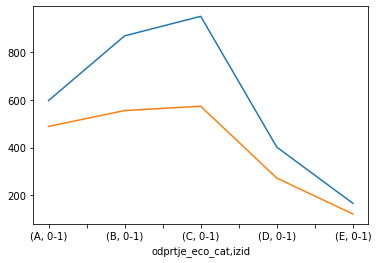

In [9]:
igre[igre["izid"] == "1-0"].groupby("odprtje_eco_cat")["izid"].value_counts().plot()
igre[igre["izid"] == "0-1"].groupby("odprtje_eco_cat")["izid"].value_counts().plot()

Narišemo še graf in zaključimo, da je povsod pogosteje zmagal beli.

## Hipoteza 3
> Odprtje A je pogostejše pri boljših igralcih.

V tem primeru bomo morali uporabiti podatke iger in igralcev.

In [10]:
zdruzeno = igre.merge(igralci, left_on="prvi_id", right_on="id")
odprtje_kvaliteta = zdruzeno[zdruzeno["prvi_id"] == zdruzeno["id"]][["petletje", "odprtje_eco_cat", "kvaliteta"]]
odprtje_kvaliteta

,petletje,odprtje_eco_cat,kvaliteta
0,1980,B,NaN
1,1980,B,NaN
2,1980,C,NaN
3,1980,C,NaN
4,1980,B,NaN
...,...,...,...
4995,2015,A,2488.0
4996,2015,A,2022.0
4997,2015,B,1189.0
4998,2015,A,1637.0


<AxesSubplot:xlabel='petletje'>

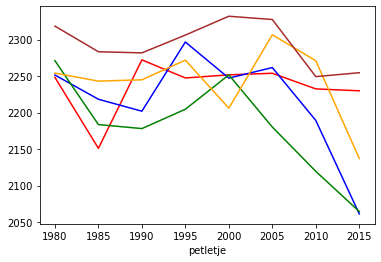

In [11]:
odprtje_kvaliteta[odprtje_kvaliteta["odprtje_eco_cat"] == "A"].groupby("petletje").kvaliteta.mean().plot(color="red")
odprtje_kvaliteta[odprtje_kvaliteta["odprtje_eco_cat"] == "B"].groupby("petletje").kvaliteta.mean().plot(color="blue")
odprtje_kvaliteta[odprtje_kvaliteta["odprtje_eco_cat"] == "C"].groupby("petletje").kvaliteta.mean().plot(color="green")
odprtje_kvaliteta[odprtje_kvaliteta["odprtje_eco_cat"] == "D"].groupby("petletje").kvaliteta.mean().plot(color="orange")
odprtje_kvaliteta[odprtje_kvaliteta["odprtje_eco_cat"] == "E"].groupby("petletje").kvaliteta.mean().plot(color="brown")

Povprečna kvaliteta igralca, ki je začel z določenim odprtjem, je torej najvišja pri kategoriji odprtij `E`, najnižja pa pri odprtjih kategorije `C`. Hipotezo torej lahko potrdimo.

## Hipoteza 4
> Igralci, ki so začeli igrati pred 1980, imajo manjši delež remijev kot ostali.

<AxesSubplot:xlabel='zacetek', ylabel='delez_remijev'>

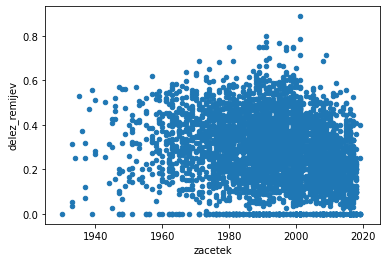

In [12]:
igralci["delez_remijev"] = igralci["remiji"] / (igralci["remiji"] + igralci["zmage"] + igralci["porazi"])
igralci.plot.scatter(x="zacetek", y="delez_remijev", xlim=(1925,2025))

<AxesSubplot:xlabel='zacetek', ylabel='delez_remijev'>

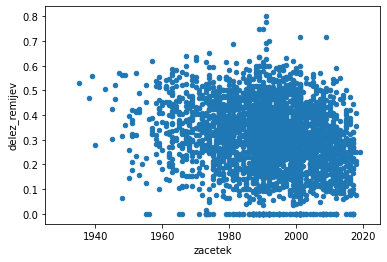

In [13]:
igralci["delez_remijev"] = igralci["remiji"] / (igralci["remiji"] + igralci["zmage"] + igralci["porazi"])
igralci[igralci["kvaliteta"] > 2000].plot.scatter(x="zacetek", y="delez_remijev", xlim=(1925,2025))

In [14]:
igralci_pred = igralci[igralci["zacetek"] < 1980]
igralci_po = igralci[1980 <= igralci["zacetek"]]

In [15]:
igralci_pred.delez_remijev.mean()

0.30392901621196167

In [16]:
igralci_po.delez_remijev.mean()

0.2633303943889917

<AxesSubplot:xlabel='zacetek_petletje'>

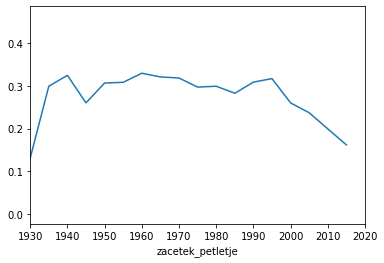

In [20]:
igralci["zacetek_petletje"] = igralci["zacetek"] // 5 * 5
igralci.groupby("zacetek_petletje").delez_remijev.mean().plot(xlim=(1930, 2020))

Povprečni delež remijev igralcev, ki so začeli igrati po letu 1980, je za štiri percentile večji od tistega od igralcev, ki so začeli igrati pred letom 1980. Razlike se mi zdi premajhna, da bi lahko potrdil hipotezo, zato je ne morem niti potrditi niti ovreči.

# Povprečna dolžina igre po letih oziroma petletjih
Kot vidimo se je povprečna dolžina iger (ki imajo manj ali enako 15 potez) višala.

<AxesSubplot:xlabel='leto'>

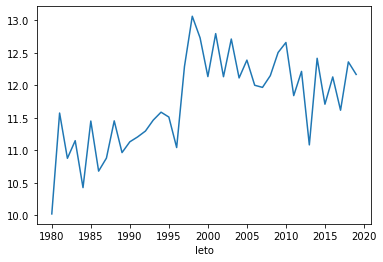

In [18]:
igre.groupby("leto").mean().stevilo_potez.plot()

<AxesSubplot:xlabel='petletje'>

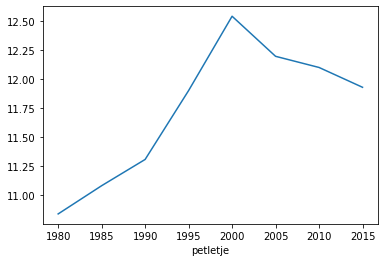

In [19]:
igre.groupby("petletje").mean().stevilo_potez.plot()